# Customer Shopping Trends Analysis

In [8]:
#importing the libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [9]:
df = pd.read_csv('shopping_trends_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Understanding the Data

In [10]:
#identifying columns in the dataset and their data types
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [11]:
#checking for null and missing values
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [12]:
#checking for duplicates in the dataset
df.duplicated().sum()

0

In [13]:
#getting summary statistics for the dataset
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


By analyzing the descriptive statistics, we can make several conclusions about the dataset.

The number of customers is 3,900.

The average age of the customers is 44.07.

The average purchase amount (USD) is 59.76.

The average review rating is 3.75.

The average number of previous purchases is 25.35.

The minimum and maximum age of the customers are 18 and 70, respectively.

The minimum and maximum purchase amount (USD) are 20 and 100, respectively.

The minimum and maximum review rating are 2.5 and 5.0, respectively.

The minimum and maximum number of previous purchases are 1 and 50, respectively.

## Exploratory Data Analysis

In [14]:
#getting the no. of unique values for different columns in the dataset
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].nunique())
    print("=" * 30)


Column: Customer ID
3900
Column: Age
53
Column: Gender
2
Column: Item Purchased
25
Column: Category
4
Column: Purchase Amount (USD)
81
Column: Location
50
Column: Size
4
Column: Color
25
Column: Season
4
Column: Review Rating
26
Column: Subscription Status
2
Column: Shipping Type
6
Column: Discount Applied
2
Column: Promo Code Used
2
Column: Previous Purchases
50
Column: Payment Method
6
Column: Frequency of Purchases
7


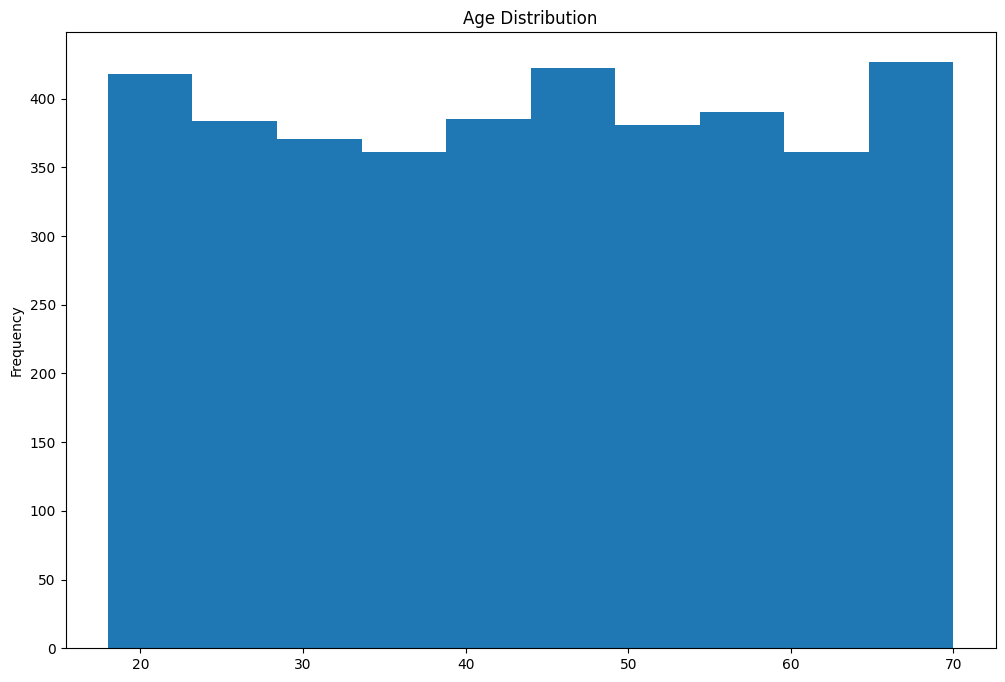

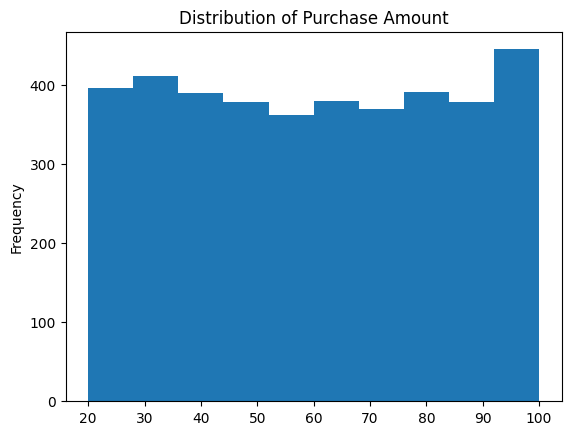

In [15]:
#visualizing the distribution of age and purchase amount

#setting the figure size
plt.figure(figsize=(12, 8))

#plotting a histogram to show the distribution of age
df['Age'].plot(kind='hist')
plt.title('Age Distribution')
plt.show()

#plotting a histogram to show purchase amount distribution
df['Purchase Amount (USD)'].plot(kind='hist')
plt.title("Distribution of Purchase Amount")
plt.show()

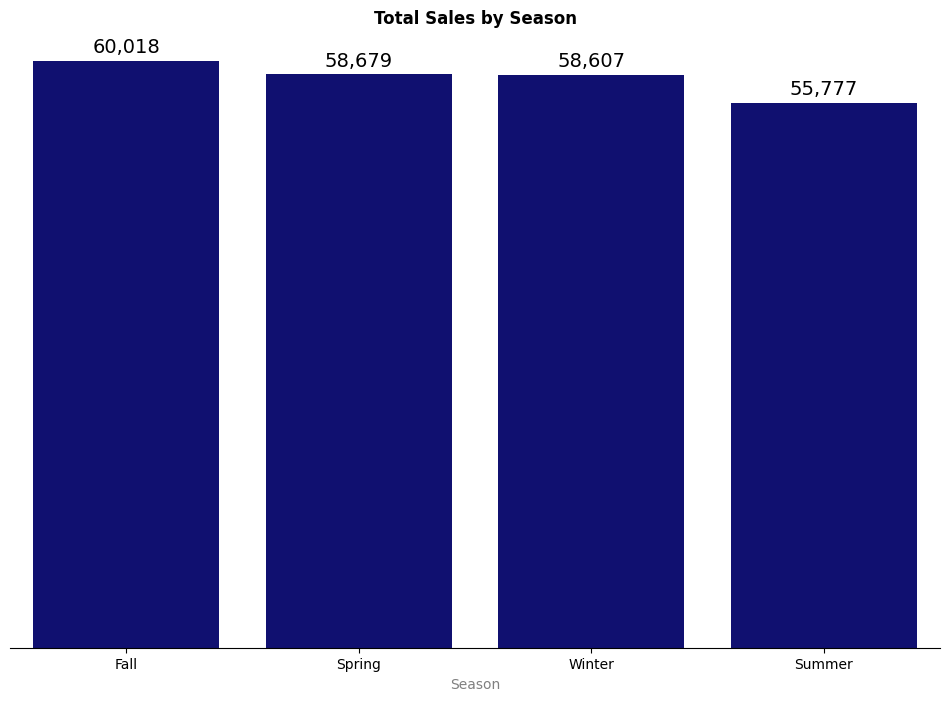

In [28]:
#visualizing the total sales per season

#setting the figure size
plt.figure(figsize=(12, 8))

#grouping the data by season
season_sales = df.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()

# Sorting the data by total sales in descending order
season_sales = season_sales.sort_values(by='Purchase Amount (USD)', ascending=False)

#plotting the data
ax = sns.barplot(x='Season', y='Purchase Amount (USD)', data=season_sales, color='navy')

#customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Total Sales by Season", fontweight='bold')
plt.xlabel("Season", color='gray')
plt.ylabel("Total Sales", color='gray')
plt.gca().yaxis.set_visible(False)

#annotating the plot
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', 
                 va='bottom',
                 fontsize=14)
    
plt.show()

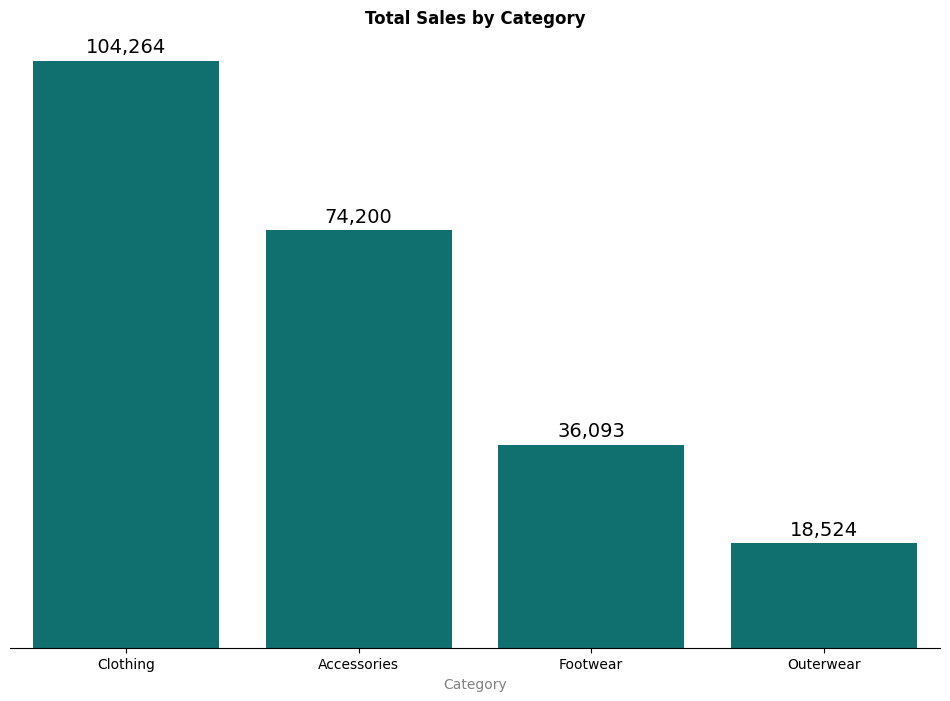

In [29]:
#visualizing the total sales by category

#setting the figure size
plt.figure(figsize=(12, 8))

#grouping the data by season
category_sales = df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()

# Sorting the data by total sales in descending order
category_sales = category_sales.sort_values(by='Purchase Amount (USD)', ascending=False)

#plotting the data
ax = sns.barplot(x='Category', y='Purchase Amount (USD)', data=category_sales, color='teal')

#customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

plt.title("Total Sales by Category", fontweight='bold')
plt.xlabel("Category", color='gray')
plt.ylabel("Total Sales", color='gray')
plt.gca().yaxis.set_visible(False)

#annotating the plot
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', 
                 va='bottom',
                 fontsize=14)
    
plt.show()

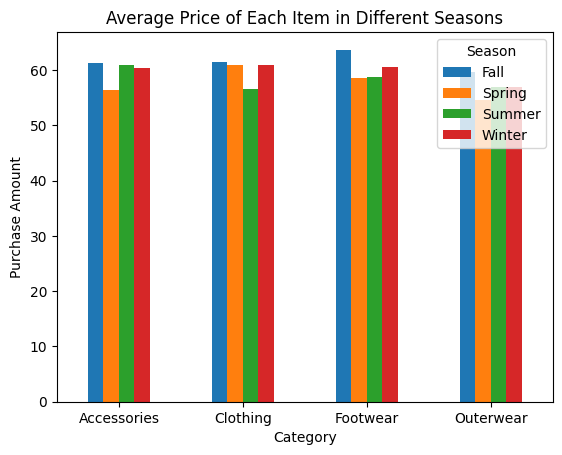

In [26]:
#visualizing the average price of different categories in different seasons

# Calculate the average purchase amount for each item and season
average_purchase_amount = df.pivot_table(values='Purchase Amount (USD)', index='Category', columns='Season', aggfunc='mean')

# Plot the average purchase amount for each item and season
fig, ax = plt.subplots()
ax.set_title('Average Price of Each Item in Different Seasons')
ax.set_xlabel('Item')
ax.set_ylabel('Purchase Amount')
average_purchase_amount.plot(kind='bar', ax=ax)
plt.xticks(rotation=0)
plt.show()

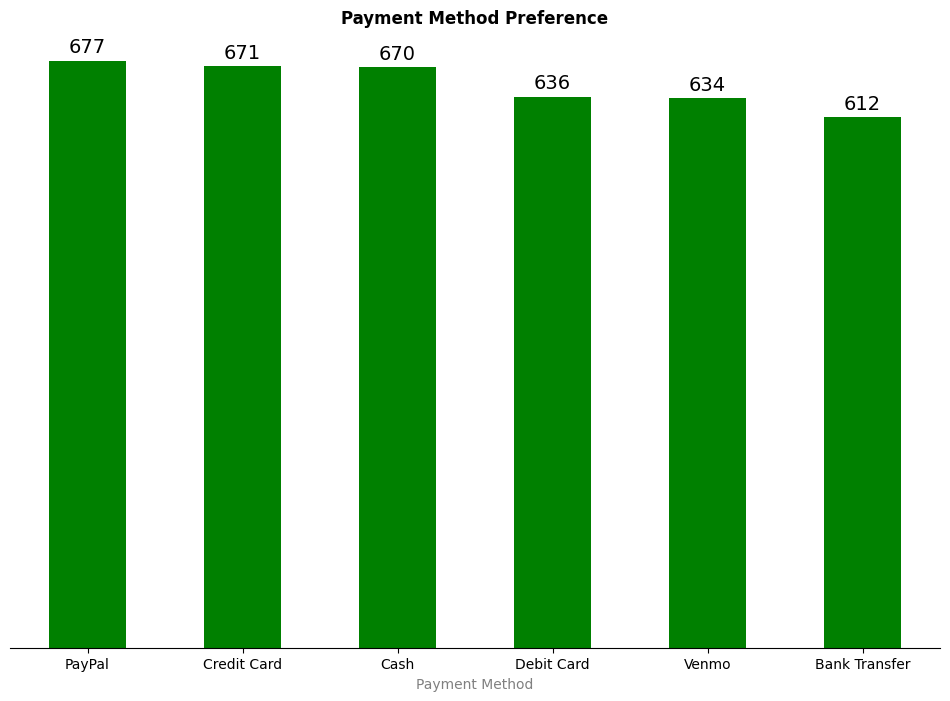

In [27]:
#visualizing the preference of Payment Method

#setting the figure size
plt.figure(figsize=(12, 8))

#plotting the data
ax = df['Payment Method'].value_counts().plot(kind='bar', color='green')

#customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Payment Method Preference", fontweight='bold')
plt.xlabel("Payment Method", color='gray')
plt.xticks(rotation=0)
plt.gca().yaxis.set_visible(False)

#annotating the plot
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', 
                 va='bottom',
                 fontsize=14)
    
plt.show()

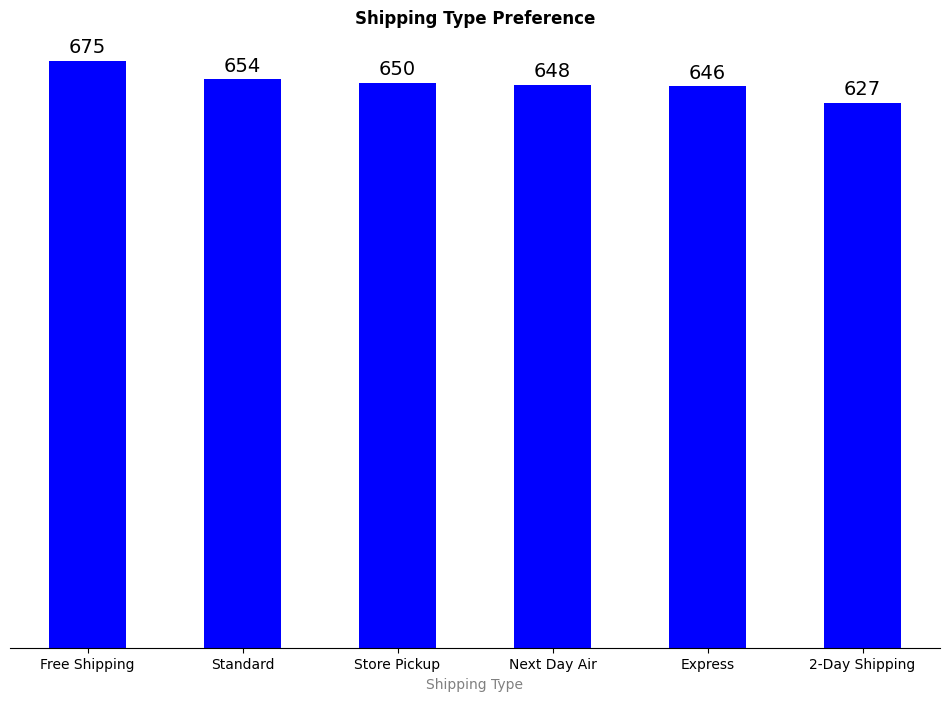

In [24]:
#visualizing the preferred shipping type

#setting the figure size
plt.figure(figsize=(12, 8))

#plotting the data
ax = df['Shipping Type'].value_counts().plot(kind='bar', color='blue')

#customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Shipping Type Preference", fontweight='bold')
plt.xlabel("Shipping Type", color='gray')
plt.xticks(rotation=0)
plt.gca().yaxis.set_visible(False)

#annotating the plot
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', 
                 va='bottom',
                 fontsize=14)
    
plt.show()

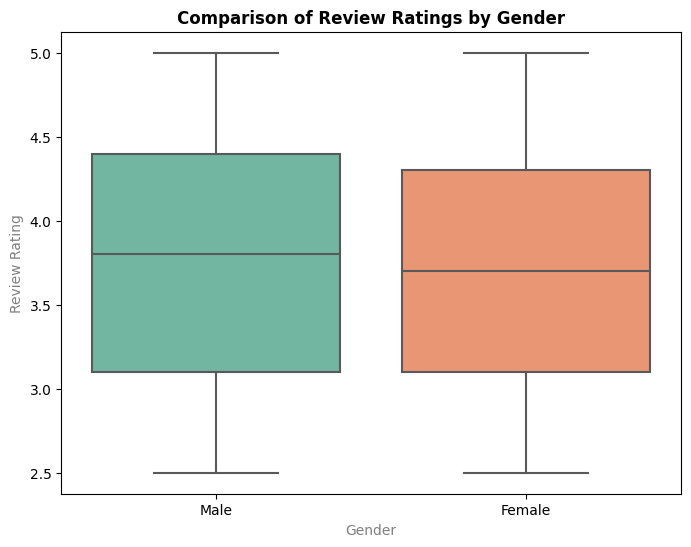

In [30]:
# Creating the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Review Rating', data=df, palette='Set2')

# Customizing the plot
plt.title('Comparison of Review Ratings by Gender', fontweight='bold')
plt.xlabel('Gender', color='gray')
plt.ylabel('Review Rating', color='gray')

plt.show()

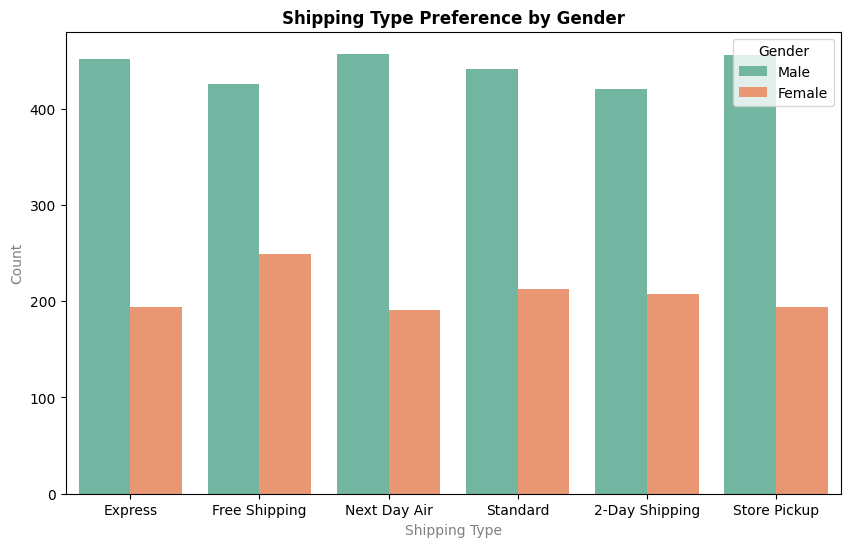

In [32]:
# Creating the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Shipping Type', hue='Gender', data=df, palette='Set2')

# Customizing the plot
plt.title('Shipping Type Preference by Gender', fontweight='bold')
plt.xlabel('Shipping Type', color='gray')
plt.ylabel('Count', color='gray')
plt.legend(title='Gender')

plt.show()